## Quiz 1: Modelos de Regresión

### 1. Importación, limpieza y visualización de la matriz de datos

In [61]:
import csv
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

with open('data_quiz.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    csv_data = [row for row in reader]
numeric_data = []
for row in csv_data[1:]:
    clean_row = [cell.replace('\u200b', '').strip() for cell in row]
    try:
        numeric_row = [float(cell) for cell in clean_row]
        numeric_data.append(numeric_row)
    except ValueError:
        continue # Ignora las filas que no se pueden convertir

data = sp.Matrix(numeric_data)
data

Matrix([
[-10.0,  13.75],
[ -8.0,  13.06],
[ -5.0,  11.04],
[ -2.0,   9.11],
[ -1.0,   7.99],
[  0.0,   5.75],
[  1.0,   4.59],
[  2.0,   0.22],
[ 2.95, -15.21],
[  4.0,   0.19],
[  4.5,   2.28],
[  5.5,   4.94],
[  6.5,   6.88],
[  7.0,   7.34],
[ 10.0,  10.94],
[ 12.0,  12.22],
[ 15.0,  13.18],
[ 20.0,  14.78],
[ 30.0,  18.09],
[ 50.0,  20.44]])

### 2. Visualización Gráfica de los Datos

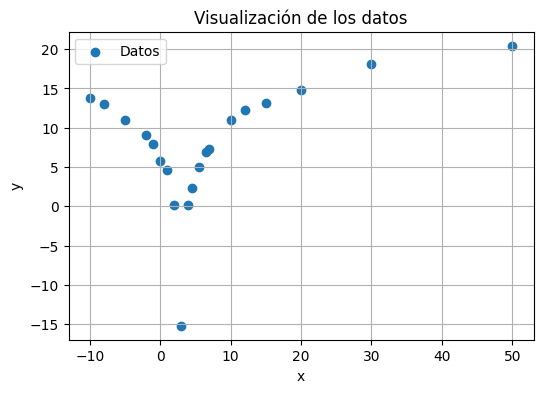

In [62]:
# Visualización de los datos
plt.figure(figsize=(6, 4))
plt.scatter(data[:, 0], data[:, 1], label='Datos')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualización de los datos')
plt.legend()
plt.grid(True)
plt.show()

# Convertir la matriz de datos a lista de tuplas
def prepare_data(raw_data):
    if isinstance(raw_data, sp.Matrix):
        return [(float(raw_data[i, 0]), float(raw_data[i, 1])) for i in range(raw_data.rows)]
    elif isinstance(raw_data, (list, tuple)):
        return [(float(xi), float(yi)) for xi, yi in raw_data]
    else:
        raise TypeError("Formato de datos no reconocido: use lista de tuplas o Sympy Matrix")

### 3. Escoger la función para la tendencia de los datos

In [63]:
# Definir símbolos y modelo
C0, C1, x = sp.symbols('C0 C1 x')
model_logarithmic = C0 + C1*sp.log(abs(x-3))

# Preparar datos
data = prepare_data(data)

# Transformar
A = sp.Matrix([[np.log(abs(xi-3)), 1] for xi, yi in data]) 
y_vec = sp.Matrix([yi for xi, yi in data])

# Resolver las ecuaciones: (A^T A)·[C1, C0]^T = A^T·y
AtA = A.T * A
Aty = A.T * y_vec

if AtA.det() == 0:
    raise ValueError("A^T*A es singular en el modelo logarítmico.")

C_vec = AtA.inv() * Aty  # [C1, C0]
C1_val = float(C_vec[0])
C0_val = float(C_vec[1])

# Modelo ajustado simbólico
adjusted_model = model_logarithmic.subs({C0: C0_val, C1: C1_val})
print("\nModelo ajustado:")
y = sp.symbols('y')
display(sp.Eq(y, sp.simplify(adjusted_model)))

# Imprimir matrices
print("\nMatriz A:")
display(A)
print("\nVector y:")
display(y_vec)
print("\nMatriz A^T * A:")
display(AtA)
print("\nMatriz A^T inversa:")
display(AtA.inv())
print("\nVector A^T * y:")
display(Aty)
print("\nVector de coeficientes C:")
display(C_vec)


Modelo ajustado:


Eq(y, 5.24353167297823*log(Abs(x - 3)) + 0.370458394586276)


Matriz A:


Matrix([
[ 2.56494935746154, 1],
[ 2.39789527279837, 1],
[ 2.07944154167984, 1],
[  1.6094379124341, 1],
[ 1.38629436111989, 1],
[ 1.09861228866811, 1],
[0.693147180559945, 1],
[              0.0, 1],
[-2.99573227355399, 1],
[              0.0, 1],
[0.405465108108164, 1],
[0.916290731874155, 1],
[ 1.25276296849537, 1],
[ 1.38629436111989, 1],
[ 1.94591014905531, 1],
[ 2.19722457733622, 1],
[   2.484906649788, 1],
[ 2.83321334405622, 1],
[ 3.29583686600433, 1],
[ 3.85014760171006, 1]])


Vector y:


Matrix([
[ 13.75],
[ 13.06],
[ 11.04],
[  9.11],
[  7.99],
[  5.75],
[  4.59],
[  0.22],
[-15.21],
[  0.19],
[  2.28],
[  4.94],
[  6.88],
[  7.34],
[ 10.94],
[ 12.22],
[ 13.18],
[ 14.78],
[ 18.09],
[ 20.44]])


Matriz A^T * A:


Matrix([
[84.8244763850421, 29.4020979987155],
[29.4020979987155,               20]])


Matriz A^T inversa:


Matrix([
[ 0.0240382835345452, -0.0353387984101804],
[-0.0353387984101804,   0.101951740700649]])


Vector A^T * y:


Matrix([
[455.672082590834],
[          161.58]])


Vector de coeficientes C:


Matrix([
[ 5.24353167297823],
[0.370458394586276]])

### 4. Visualización y Análisis de Resultados

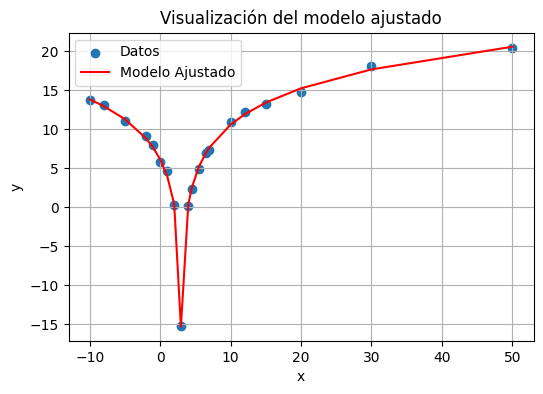

In [64]:
# Visualizar el modelo ajustado
plt.figure(figsize=(6, 4))
plt.scatter([xi for xi, yi in data], [yi for xi, yi in data], label='Datos')
x_vals = [xi for xi, yi in data]
y_vals = [adjusted_model.subs(x, xi) for xi in x_vals]
plt.plot(x_vals, y_vals, color='red', label='Modelo Ajustado')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualización del modelo ajustado')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
# Evaluar el modelo ajustado
# Calcular R cuadrado (Coeficiente de determinación)
y_actual = [yi for xi, yi in data]
y_predicted = [adjusted_model.subs(x, xi) for xi, yi in data]

# Suma total de cuadrados (SST)
sst = sum((yi - sp.Rational(sum(y_actual) / len(y_actual)))**2 for yi in y_actual)

# Suma de cuadrados residuales (SSR)
ssr = sum((yi - y_pred)**2 for yi, y_pred in zip(y_actual, y_predicted))

# R cuadrado
r_squared = 1 - (ssr / sst)

# Calcular el Error Cuadrático Medio (ECM)
ecm = ((sum((yi - y_pred)**2 for yi, y_pred in zip(y_actual, y_predicted)) / len(y_actual))** 0.5)

print(f"R cuadrado: {r_squared}")
print(f"ECM: {ecm}")

R cuadrado: 0.998484588777377
ECM: 0.294612885475172
